In [41]:
df=df.drop(['State','City/Town/Village/Area','Agency', 'Type of Location', 'Stn Code'], axis=1)

KeyError: "['State', 'City/Town/Village/Area', 'Agency', 'Type of Location', 'Stn Code'] not found in axis"

In [ ]:
df

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
#pivot_df = pd.pivot_table(df, values='SO2', index='Sampling Date', columns='Location of Monitoring Station')

pivot_df = pivot_df.interpolate(method='linear')
pivot_df.plot()
plt.legend()

import numpy as np
plt.rcParams["figure.figsize"] = (15,5.5)
plt.ylim([0,100])
plt.show()

In [ ]:


print(df)

print(df.dtypes)

df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
df=df.set_index('Sampling Date')
df.to_csv('data.csv')


import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
#pivot_df = pd.pivot_table(df, values='SO2', index='Sampling Date', columns='Location of Monitoring Station')

pivot_df = pivot_df.interpolate(method='linear')
pivot_df.plot()
plt.legend()

plt.rcParams["figure.figsize"] = (15,5.5)
plt.ylim([0,100])
plt.show()

In [ ]:
df2 = df.loc[:, 'NO2'].to_frame()

print(df2)

df2['NO2'] = df2['NO2'].interpolate(option='spline')

df2.to_csv('azure_train.csv')

df2['y'] = df2['NO2'].shift(-1)
print(df2.index)

print(df2.head(20))

In [ ]:
train = df2[:400]
test = df2[400:]
test = test.drop(test.tail(1).index) # Drop last row
print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

In [ ]:
test = test.copy()

test['baseline_pred'] = test['NO2']
print(test)

test.interpolate(method='linear', inplace=True)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train = train['NO2'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['NO2'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

print(test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test['gbr_pred'] = gbr_pred
print(test)

test.to_csv('lkamsldf.csv')

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

import numpy as np

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['NO2'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    


plt.show()

In [ ]:
import torch
import numpy as np

# 1. Load necessary libraries
# (assuming your model architecture is defined in a separate file)
from my_model import MyModel

# 2. Define the model architecture and load the trained weights
model = MyModel()
model.load_state_dict(torch.load('model.pt'))

# 3. Load the data to forecast
data_to_forecast = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# 4. Preprocess the data (assuming the model expects normalized data)
data_to_forecast_normalized = (data_to_forecast - mean) / std

# 5. Pass the data to the model and obtain predictions
with torch.no_grad():
    inputs = torch.tensor(data_to_forecast_normalized, dtype=torch.float32)
    predictions = model(inputs)

# 6. Postprocess the predictions (assuming the model outputs normalized data)
predictions_denormalized = predictions * std + mean


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("sorted_data.csv")

# Convert the "Sampling Date" column to datetime format and extract the year as a separate column
df["Sampling Date"] = pd.to_datetime(df["Sampling Date"])
df["Year"] = df["Sampling Date"].dt.year

# Group the DataFrame by year and location, and calculate the sum concentration of each pollutant
df_grouped = df.groupby(["Year", "Location of Monitoring Station"])[["NO2", "SO2", "RSPM/PM10"]].sum().reset_index()

# Create a pivot table with the year as the index, location as columns, and pollutant concentration as values
df_pivot = df_grouped.pivot(index="Year", columns="Location of Monitoring Station")

# Reset the column levels to 1 so that we can use the location as the hue variable
df_pivot.columns = df_pivot.columns.get_level_values(1)

# Set the color palette
colors = sns.color_palette("icefire", len(df_pivot.columns))

# Plot the stacked bar chart with location as hue
g = sns.catplot(data=df_grouped, x="Year", y="NO2", hue="Location of Monitoring Station", kind="bar", height=6, aspect=1.2, palette=colors)
g.despine(left=True)
g.set_axis_labels("Year", "Pollutant Concentration")
g.legend.set_title("Location")
g.fig.suptitle("Yearwise pollutant level across three locations")

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("sorted_data.csv")

# Convert the "Sampling Date" column to datetime format and extract the year as a separate column
df["Sampling Date"] = pd.to_datetime(df["Sampling Date"])
df["Year"] = df["Sampling Date"].dt.year

# Group the DataFrame by year and location, and calculate the concentration of each pollutant
df_grouped = df.groupby(["Year", "Location of Monitoring Station"])[["NO2", "SO2", "RSPM/PM10"]].mean().reset_index()

# Melt the DataFrame to convert the pollutants into a single column
df_melt = pd.melt(df_grouped, id_vars=["Year", "Location of Monitoring Station"], var_name="NO2", value_name="Concentration")

# Set the color palette

palette = ["#024b7a","#44a5c2", "#ffae49"]

colors = sns.color_palette(palette, len(df_grouped["NO2"].unique()))

# Plot the stacked bar chart with pollutant as hue
g = sns.catplot(data=df_melt, x="Year", y="Concentration", hue="NO2", col="Location of Monitoring Station", kind="bar", height=6, aspect=1.2, palette=colors)
g.despine(left=True)
g.set_axis_labels("Year", "Pollutant Concentration")
g.legend.set_title("Pollutant")
#g.fig.suptitle("Yearwise pollutant concentration across three locations")

plt.show()



(1697, 5)
(1413, 5)


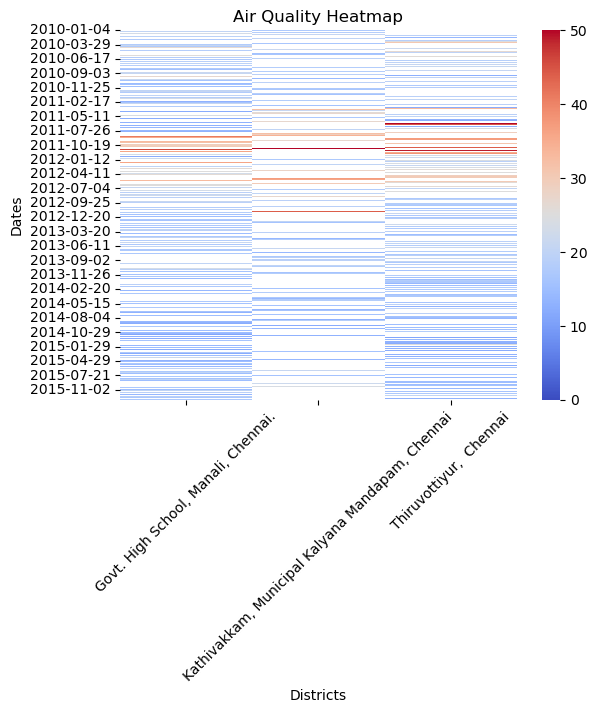

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("sorted_data.csv")
print(df.shape)
df = df.drop_duplicates(subset="Sampling Date")
print(df.shape)

# Pivot the data to have the dates as rows, and the districts as columns
df_pivot = df.pivot(index="Sampling Date", columns="Location of Monitoring Station", values="NO2")

# Generate the heatmap
sns.heatmap(df_pivot, cmap="coolwarm", vmin=0, vmax=50)

# Set the title and axis labels
plt.title("Air Quality Heatmap")
plt.xlabel("Districts")
plt.ylabel("Dates")
plt.xticks(rotation=45)
# Display the plot
plt.show()




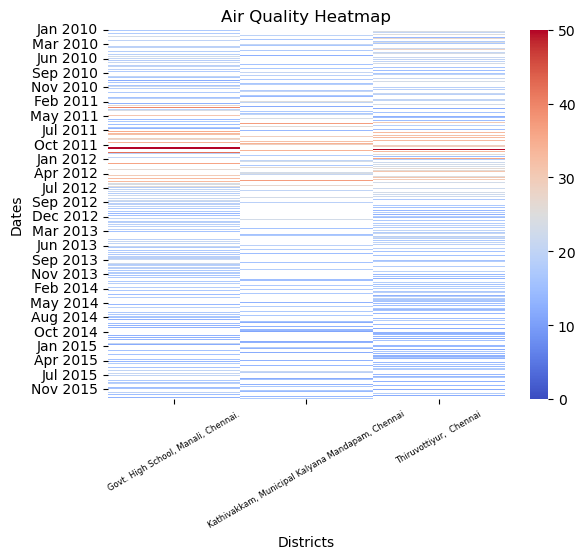

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("sorted_data.csv")
df = df.drop_duplicates(subset="Sampling Date")

# Convert the Sampling Date column to a pandas DatetimeIndex
df["Sampling Date"] = pd.to_datetime(df["Sampling Date"], format="%Y-%m-%d")
df.set_index("Sampling Date", inplace=True)

# Pivot the data to have the dates as rows, and the districts as columns
df_pivot = df.pivot(columns="Location of Monitoring Station", values="NO2")

# Format the y-axis labels to show only the month and year
df_pivot.index = df_pivot.index.strftime('%b %Y')

# Generate the heatmap with adjusted y-axis labels
sns.heatmap(df_pivot, cmap="coolwarm", vmin=0, vmax=50)

# Set the title and axis labels
plt.title("Air Quality Heatmap")
plt.xlabel("Districts")
plt.ylabel("Dates")
plt.xticks(rotation=30, fontsize=6)
# Display the plot
plt.show()
